# INTRODUCCION A LAS REDES NEURONALES ARTIFICIALES CON KERAS

Los pájaros nos inspiraron para volar, las plantas de bardana inspiraron el velcro e innumerables inventos más se inspiraron en la naturaleza. Parece lógico, entonces, mirar la arquitectura del cerebro en busca de inspiración sobre cómo construir una máquina inteligente. Esta es la idea clave que sirvió de chispa para las *redes neuronales artificiales - RNAs (artificial neuronal networks - ANN)*. Sin embargo, aunque los aviones se inspiraron en los pájaros, no tienen que batir sus alas. De forma similiar, las RNAs se han vuelto gradualmente bastante diferentes de sus primas biológicas. Algunos investigadores incluso argumentan que deberíamos abandonar por completo la analogía biológica (por ejemplo, diciendo "unidades" en lugar de "neuronas"), para que no restrinjamos nuestra creatividad a sistemas biológicamente plausibles (*podemos obtener lo mejor de ambos mundos estando abiertos a inspiraciones biológicas sin temor a crear modelos biológicamente irreales, siempre que funcionen bien*).

Las RNAs son el corazón del Deep Learning. Son versátiles, poderosas y escalables, haciéndolas ideales para abordar tareas grandes y altamente complejas de machine learning, tales como la clasificación de billones de imágenes (por ejemplo, Google Images), potenciar los servicios de reconocimiento del habla (por ejemplo, Siri de Apple), recomendar los mejores videos para ver a cientos de millones de usuarios cada dia (por ejemplo, YouTube) o aprendiendo a vencer al campeón del mundo del juego de *Go* jugando millones de partidas contra sí misma (Alpha-Zero de DeepMind).

En la primera parte de este capítulo, nos introduciremos en las redes neuronales artificiales, empezando por un rápido recorrido por las primera arquitecturas de RNAs, hasta llegar a los *Perceptrones Multi-Capa PMCs* (*Multi-Layer Perceptrons, MLPs*), que se utilizan mucho en la actualidad (en otros capítulos exploraremos otras arquitecturas). En la segunda parte, echaremos un vistazo a cómo implementar RNAs usando la popular API Keras. Se trata de una API de alto nivel maravillosamente diseñada para la construcción, entrenamiento, evaluación y ejecución de redes neuronales. Pero no nos dejemos engañar por su simplicidad: es lo suficientemente expresiva y flexible para construir una amplia variedad de arquitecturas de redes neuronales. De hecho, probablemente será suficiente para la mayoría de nuestros casos. Además, si alguna vez necesitamos flexibilidad extra, siempre podremos escribir componentes de Keras personalizados usando su API de bajo nivel, como veremos más adelante.

Pero primero, retrocedamos en el tiempo para ver cómo surgieron las redes neuronales artificiales.

# De las neuronas biológicas a las artificiales

Sorprendentemente, las RNAs existen desde hace bastante poco: fueron introducidas por primera vez en 1943 por el neurofisiólogo Warren McCulloch y el matemático Walter Pitts. En su [Artículo](https://homl.info/43) “A Logical Calculus of Ideas Immanent in Nervous Activity”, McCulloh y Pitts presentaron un modelo computacional simplificado de cómo las neuronas biológicas podrían trabajar juntas en el cerebro de los animales para ejecutar cálculos complejos usando *lógica proposicional*. Esta fue la primera arquitectura de red neuronal artifical. Desde entonces, se han inventado otras muchas arquitecturas, como veremos.

Los primeros éxitos de las RNAs hasta la década de 1960 llevaron a la creencia generalizada de que pronto estaríamos conversando con máquinas verdaderamente inteligentes. Cuando quedó claro que esa promesa no sería cumplida (al menos durante bastante tiempo), los fondos y la inversión volaron hacia otra parte y las RNAs entraron en un largo invierno. A principios de la década de 1980 se produjo un resurgimiento del interés en el *conexionismo* (el estudio de las redes neuronales), a medida que se inventaron nuevas arquitecturas y se desarrollaron mejores técnicas de entrenamiento. Pero el progreso fue lento y en la década de 1990 se inventaron otras poderosas técnicas de Machine Learning, tales como las Máquinas de Soporte Vectorial. Estas técnicas parecían ofrecer mejores resultados y bases teóricas más solidas que las RNAs, así que una vez más el estudio de las redes neuronales entró en hibernación.

Finalmente, ahora estamos presenciando otra ola de interés en las RNAs. ¿Esta ola se extinguirá como las anteriores? Bueno, existen buenas razones para creer que esta ola es diferente y que tendrá un impacto mucho más profundo en nuestras vidas:

+ Ahora existe una enorme cantidad de datos disponibles para entrenar a las redes neuronales y las RNAs superan frecuentemente a otras técnicas de ML en problemas muy grandes y complejos.

+ El tremendo incremento en poder computacional desde la década de 1990 posibilita ahora entrenar grandes redes neuronales en una cantidad de tiempo razonable. Esto es en parte debido a la Ley de Moore, pero también gracias a la industria del juego, que ha producido por millones poderosas tarjetas GPU.

+ Los algoritmos de entrenamiento han sido mejorados. Para ser justos, solo son ligeramente diferentes de los usados en la década de 1990, pero estos pequeños ajustes han tenido un impacto enorme.

+ Algunas limitaciones teóricas de las RNAs han resultado ser benignas en la práctica. Por ejemplo, mucha gente pensó que los algoritmos de entrenamiento estaban condenados porque era probable que se atascaran en óptimos locales, pero resulta que esto es bastante raro en la práctica (o cuando es el caso, generalmente están bastante cerca del óptimo global).

+ Las RNAs parecen haber entrado en un círculo virtuoso de financiación y progreso. Asombrosos productos basados en RNAs aparecen regularmente en las portadas de las noticias, lo que atrae cada vez más la atención y financiación hacia ellos, resultando en más y más progreso e incluso en más productos asombrosos.

## Neuronas biológicas

Antes de que discutamos las neuronas artificiales, echemos un rápido vistazo a las neuronas biológicas (representadas en la siguiente figura). Es una célula de aspecto inusual que se encuentra en la corteza cerebral animal (por ejemplo, nuestro cerebro), compuesta por un *cuerpo celular*, conteniendo el núcleo y la mayoría de los componentes complejos de la célula, y muchas extensiones ramificadas denominadas *dendritas*, más una larga extensión llamado *axón*. La longitud del axón puede ser solo un poco más largo que el cuerpo de la célula o hasta decenas de miles de veces más largo. Cerca de su extremidad, el axón se divide en muchas ramas llamadas *telodendritas* y en la punta de esas ramificaciones hay minúsculas estructuras llamadas *terminales sinápticas* (o simplemente *sinapsis*), que están conectadas a las dendritas (o directamente al cuerpo de la célula) de otras neuronas. Las neuronas biológicas reciben impulsos eléctricos cortos llamados *señales* de otras neuronas a través de estas sinapsis. Cuando una neurona recibe un número suficiente de señales de otras neuronas en unos pocos milisegundos, dispara sus propias señales.

![biological_neuron](images/ch10/biological_neuron.png)

Por lo tanto, las neuronas biológicas individuales parecen comportarse de una manera bastante simple, pero están organizadas en un vasta red de billones de neuronas, cada neurona conectada normalmente a miles de otras neuronas. Se pueden realizar cálculos altamente complejos mediante una red de neuronas bastante simples, al igual que un hormiguero puede emerger de los esfuerzos combinados de simples hormigas. La arquitectura de las redes neuronales biológicas (RNB) es todavía objeto de investigación activa, pero se han mapeado algunas partes del cerebro y parece que a menudo las neuronas se organizan en capas consecutivas, como se muestra en la siguiente figura, que representa las múltiples capas de una RNB del córtex humano.

![multiple_layers](images/ch10/multiple_layers.png)

## Cálculos lógicos con neuronas

Warren McCulloch y Walter Pitts propusieron un modelo muy simple de neurona biológica, que posteriormente se conoció como *neurona artificial*: tenía una o más entradas binarias (on/off) y una salida binaria. La neurona artifical simplemente activa su salida cuando cierto número de sus entradas están activas. MacCulloch y Pitts mostraron que incluso con este modelo simplificado es posible construir una red de neuronas artificiales que pueden calcular cualquier proposición lógica que se quiera. Por ejemplo, construyamos algunas RNAs para ejecutar varios cálculos lógicos (ver siguiente figura), asumiendo que una neurona se activa cuando al menos dos de sus entradas están activas.

![rna_performing](images/ch10/rna_performing.png)

+ La primera red de la izquierda simplemente es la función identidad: si una neurona A está activada, la neurona C también se activa (dado que recibe dos señales de entrada de la neurona A), pero si la neurona A está apagada, la neurona C también está apagada.

+ La segunda red ejecuta un AND lógico: la neurona C está activada solo cuando las neuronas A y B están activadas (una única señal de entrada no es suficiente para activar la neurona C).

+ La tercera red ejecuta un OR lógico: la neurona C se activa si cualquiera de las neuronas A o B está activa (o ambas).

+ Finalmente, si suponemos que una conexión de entrada puede inhibir la actividad de una neurona (como es el caso de las neuronas biológicas), entonces la cuarta red calcula una proposición lógica ligeramente más compleja: la neurona C es activada solo si la neurona A está activada y si la neurona B está apagada. Si la neurona A está activada todo el tiempo, entonces tendremos un NOT lógico: la neurona C está activada cuando la neurona B está apagada, y viceversa.

Podemos imaginar fácilmente cómo podemos combinar estas redes para calcular expresiones lógicas complejas.

## El perceptrón

El perceptrón es una de las arquitecturas RNA más simples, inventada en 1957 por Frank Rosenblatt. Se basa en una neurona artificial ligeramente diferente (ver la siguiente figura) llamada *unidad lógica de umbral* (*threshold logic unit - TLU*) o algunas veces *unidad de umbral lineal* (*linear threshold unit - LTU*): las entradas y las salidas son ahora números (en lugar de valores binarios on/off) y cada conexión de entrada está asociada con un peso. La TLU calcula una suma ponderada de sus entradas ($z = w_1x_1 + w_2x_2 + \dots + w_nx_n = x^Tw$) y luego aplica una *función de paso* a esta suma y devuelve el resultado: $h_w(x) = \text{step}(z)$, donde $z = x^Tw$.

![TLU](images/ch10/TLU.png)

La función de paso más común usada en los perceptrones es la *función Heaviside*. Algunas veces se usa la función señal en su lugar.

![heaviside](images/ch10/heaviside.png)

Una única TLU se puede usar para clasificación binaria lineal simple. Calcula una combinación lineal de las entradas y si el resultado excede un umbral, devuelve la clase positiva y si no devuelve la clase negativa (como un clasificador de regresión logística o un SVM lineal). Por ejemplo, podemos usar una única TLU para clasificar flores de iris basándonos en la longitud y ancho del pétalo (también añadiendo una característica de sesgo extra $x_0 = 1$, como hicimos en anteriores capítulos). En este caso, entrenar una TLU significa encontrar el valor correcto para $w_0$, $w_1$ y $w_2$.

Un perceptrón se compone simplemente de una única capa de TLUs (*el nombre de perceptrón se usa algunas veces para referirse a una red pequeña con una única TLU*), con cada TLU conectada a todas las entradas. Cuando todas las neuronas de una capa están conectadas a cada neurona de la capa previa (es decir, sus neuronas de entrada), es llamada una *capa conectada completamente* o una *capa densa*. Para representar el hecho de que cada entrada se envía a cada TLU, es común dibujar neuronas de paso especiales llamadas *neuronas de entrada*: simplemente emiten cada entrada que se les proporciona. Todas las neuronas de entrada forman la *capa de entrada*. Además, generalmente se añade una característica de sesgo extra ($x_0 = 1$): es normalmente representada usando un tipo especial de neurona llamada *neurona de sesgo*, que solo emite 1 todo el tiempo. Un perceptrón con dos entradas y tres salidas está representado en la siguiente figura. Este perceptrón puede clasificar simultáneamente instancias en tres clases binarias diferentes, lo que lo convierte en una clasificador de múltiples salidas.

![perceptron](images/ch10/perceptron.png)

Gracias a la magia del álgebra lineal es posible calcular eficientemente las salidas de una capa de neuronas artificiales para varias instancias a la vez usando la siguiente ecuación:

$h_{W, b}(X) = \phi(XW + b)$

+ Como siempre, **X** representa la matriz de características de entrada. Tiene una fila por instancia y una columna por característica.

+ La matriz de pesos **W** contiene todas los pesos de conexiones excepto los de la neurona de sesgo. Tiene una fila por neurona de entrada y una columna por neurona artificial en la capa.

+ El vector de sesgo **b** contiene todas los pesos de conexiones entre la neurona de sesgo y las neuronas artificiales. Tiene un término de sesgo por neurona artificial.

+ La función $\phi$ se denomina *función de activación*: cuando las neuronas artificiales son TLUs, es una función de paso.

¿Cómo se entrena un perceptrón? El algoritmo de entrenamiento del perceptrón propuesto por Frank Rosenblatt se inspiró en gran medida en la *regla de Hebb*. En su libro *The organization of behavior*, publicado en 1949, Donald Hebb sugiere que cuando una neurona biológica a menudo activa otra neurona, la conexión entra ambas se fortalece. Esta idea fue posteriormente resumida por Siegrid Löwel en esta frase pegadiza: "Las células que se disparan juntas, se conectan juntas". Esta regla se conoció más tarde como la regla de Hebb (o *aprendizaje hebbiano*); es decir, el peso de conexión entre dos neuronas aumenta siempre que tengan la misma salida. Los perceptrones son entrenados usando una variante de esta regla que tiene en cuenta el error cometido por la red; refuerza las conexiones que ayudan a reducir este error. Más específicamente, el perceptrón recibe una instancia de entrenamiento a la vez y por cada instancia hace sus predicciones. Por cada salida de neurona que produce una predicción errónea, refuerza los pesos de conexión de las entradas que habrían contribuido a la predicción correcta. La regla se muestra en la siguiente ecuación.

$w_{i,j}^{(\text{siguiente paso})} = w_{i, j} + \eta(y_j - \hat{y}_j)x_i$

+ $w_{i,j}$ es el peso de conexión entre la i-ésima neurona de entrada y la j-ésima neurona de salida.

+ $x_i$ es el i-ésimo valor de entrada de la actual instancia de entrenamiento.

+ $\hat{y}_j$ es la salida de la j-ésima neurona de salida de la actual instancia de entrenamiento.

+ $y_j$ es la salido objetivo de la j-ésima neurona de salida de la actual instancia de entrenamiento.

+ $\eta$ es la tasa de aprendizaje.

El límite de decisión de cada neurona de salida es lineal, por tanto los perceptrones son incapaces de patrones complejos de aprendizaje (al igual que los clasificadores de regresión logística). Sin embargo, si las instancias de entrenamiento son linealmente separables, Rosenblatt demostró que este algoritmo convergería a una solución (*tengamos en cuenta que esta solución es generalmente no única: en general cuando los datos son linealmente separables, existe una infinidad de hiperplanos que pueden separarlos*). Esto se denomina *Teorema de convergencia del perceptrón*.

Scikit-Learn suministra una clase `Perceptron` que implementa una única red de TLU. Puede ser usada muy fácilmente como cabría esperar -por ejemplo, en el dataset de iris:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris.data[:, (2,3)]  # longitud y ancho de pétalo
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([1])

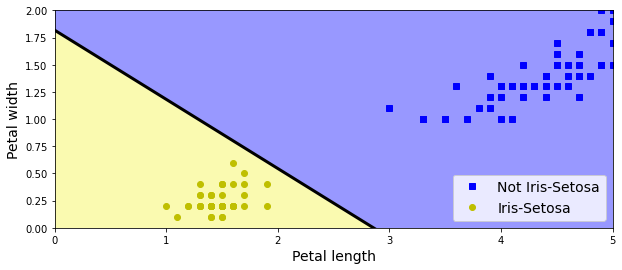

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

Es posible que hayas notado el hecho de que el algoritmo de aprendizaje del perceptrón se parece mucho al Descenso de Gradiente Estocástico. De hecho, la clase `Perceptron` de Scikit-Learn es equivalente a usar un `SGDClassifier` con los siguientes hiperparámetros: `loss="perceptron"`, `learning_rate="constant"`, `eta0=1` (tasa de aprendizaje) y `penalty=None` (sin regularización).

Tengamos en cuenta que, al contrario que los clasificadores de regresión logística, los perceptrones no devuelven una probabilidad de clase; en su lugar, hacen predicciones basadas en un umbral duro. Esta es una de las buenas razones para preferir la regresión logística sobre los perceptrones.

En su monografía de 1969 titulada *Perceptrones*, Marvin Minsky y Seymour Papert destacaron una serie de graves debilidades de los perceptrones, en particular el hecho de que eran incapaces de solventar problemas triviales (por ejemplo, el problema de clasificación de *OR exclusivo (XOR)*; ver el lado izquierdo de la siguiente figura). Por supuesto, esto también es cierto para cualquier otro modelo de clasificación lineal (como los clasificadores de regresión logística), pero los investigadores esperaban mucho más de los perceptrones y su decepción fue grande, y muchos abandoraron las redes neuronales por completo en favor de problemas de alto nivel como lógica, resolución de problemas y búsqueda.

Sin embargo, resulta que algunas de las limitaciones de los perceptrones pueden eliminarse apilando múltimes perceptrones. La RNA resultante se denomina *Perceptrón Multi-Capa* (*Multi-Layer Perceptron, MLP*). En particular, un MLP puede resolver el problema XOR, como podemos comprobar calculando la salida del MLP representado en la parte derecha de la siguiente figura: con entradas (0, 0) o (1, 1) la red devuelve 0 y con entradas (0, 1) o (1, 0) devuelve 1. Todas las conexiones tienen un peso igual a 1, excepto las cuatro conexiones donde se muestra el peso. 

![xor_mlp](images/ch10/xor_mlp.png)

## Perceptrón Multi-Capa y propagación hacia atrás

Un MLP está compuesto de una *capa de entrada* (de paso), una o más capas de TLUs, llamadas *capas ocultas* y una capa final de TLUs denominada *capa de salida*. Las capas más cercanas a la capa de entrada se llaman normalmente capas inferiores y las más cercanas a la de salida se llaman normalmente capas superiores. Cada capa, excepto la capa de salida, incluyen una neurona de sesgo y están completamente conectadas a la siguiente capa.

![mlp](images/ch10/mlp.png)

---

La señal fluye solo en una única dirección (de las entradas a las salidas), por tanto esta arquitectura es un ejemplo de *red neuronal prealimentada* (*feedforward neural network - FNN*)

---

Cuando una RNA contiene una pila profunda de capas ocultas (*En la década de 1990, una RNA con más de dos capas ocultas se consideraba profunda. Hoy en día es común ver RNA con docenas de capas, o incluso cientos, por lo que la definición de "profundo" es bastante confusa.*), se la denomina *red neural profunda* (*deep neural network - DNN*). El campo del aprendizaje profundo estudia las DNNs y más generalmente modelos conteniendo pilas profundas de cálculos. Sin embargo, muchas personas hablan de Deep Learning cuando se trata de redes neuronales (incluso las superficiales).

Durante muchos años los investigadores lucharon sin éxito por encontrar una forma de entrenar MLPs. Pero en 1986, David Rumelhart, Geoffrey Hinton y Ronald Williams publicaron un [innovador artículo](https://homl.info/44) presentando el algoritmo de entrenamiento de propagación hacia atrás (*backpropagation*), que aún es usado hoy en día. En resumen, es simplemente Descenso de Gradiente utilizando una técnica eficiente para calcular automáticamente los gradientes: en solo dos pasos a través de la red (uno hacia adelante y otro hacia atrás), el algoritmo de propagación hacia atrás es capaz de calcular el gradiente del error de la red con respecto a cada parámetro del modelo. En otras palabras, puede encontrar cómo se debe ajustar cada peso de conexión y cada término de sesgo para reducir el error. Una vez que tiene estos gradientes, ejecuta el paso regular de descenso de gradiente y se repite el proceso completo hasta que la red converge a la solución.

---

El cálculo automático de gradientes se denomina *diferenciación automática* (o *autodiff*). Existen varias técnicas de autodiff, con sus pros y sus contras. Una de ellas usada por la propagación hacia atrás se llama *reverse-mode autodiff*. Es rápida y precisa y se adapta bien cuando la función a diferenciar tiene muchas variables (por ejemplo, pesos de conexión) y pocas salidas (por ejemplo, una pérdida).

---

Repasemos este algoritmo con un poco más de detalle:

+ Maneja un mini-lote a la vez (por ejemplo contiene 32 instancias cada uno) y pasa por el conjunto de entrenamiento varias veces. Cada paso se llama *ciclo* (*epoch*), como vimos en el capítulo 4.

+ Cada mini-lote se pasa a la capa de entrada de la red, que simplemente lo envía a la primera capa oculta. Después el algoritmo calcula la salida de todas las neuronas de esta capa (por cada instancia del mini-lote). El resultado se pasa a la siguiente capa, se calcula su salida y se pasa a la siguiente capa y así sucesivamente hasta que obtenemos la salida de la última capa. Es el *paso hacia adelante*: es exactamente como hacer predicciones, excepto que se conservan todos los resultados intermedios, dado que son necesarios para el paso hacia atrás.

+ Después, el algoritmo mide el error de salida de la red (es decir, usa una función de pérdida que compara la salida deseada y la salida actual de la red y devuelve alguna medida del error).

+ Entonces calcula cuánto contribuye cada conexión de salida al error. Esto se realiza analíticamente simplemente aplicando la *regla de la cadena* (quizás la regla más fundamental en cálculo), que hace este paso rápido y preciso.

+ El algoritmo entonces mide cuántas de esas contribuciones de error provienen de cada conexión de la capa inferior, usando de nuevo la regla de la cadena -y así sucesivamente hasta que el algoritmo alcanza la capa de entrada. Como se explicó anteriormente, este paso inverso mide eficientemente el gradiente de error en todos los pesos de conexión de la red, propagando el gradiente de error hacia atrás a través de la red (de ahí el nombre del algoritmo).

+ Finalmente, el algoritmo ejecuta un paso de descenso de gradiente para ajustar todos los pesos de conexión en la red, usando los gradientes de error recién calculados.

El algoritmo es tan importante que vale la pena resumirlo nuevamente: por cada instancia de entrenamiento el algoritmo de propagación hacia atrás primero hace una predicción (paso hacia adelante), mide el error, después pasa por cada capa en sentido inverso para medir la contribución de error de cada conexión (paso inverso) y finalmente ajusta ligeramente los pesos de conexión para reducir el error (paso de descenso de gradiente).

---

Es importante inicializar aleatoriamente todos los pesos de conexión de las capas ocultas, de lo contrario el entrenamiento fallará. Por ejemplo, si inicializamos todos los pesos y sesgos a cero, entonces todas las neuronas en una capa serán perfectamente idénticas y, por lo tanto, la propagación hacia atrás les afectará exactamente de la misma forma, por lo que permanecerán idénticas. En otras palabras, a pesar de tener cientos de neuronas por capa, nuestro modelo actuará como si solo hubiera una neurona por capa: no será demasiado inteligente. Si, por el contrario, inicializamos aleatoriamente los pesos, *romperemos la simetría* y permitiremos que la propagación hacia atrás entrene un equipo diverso de neuronas.

---

Para que este algoritmo funcione correctamente, los autores realizaron un cambio clave a la arquitectura de MLPs: reemplazaron la función de paso con la función logística, $\sigma = 1/(1 + exp(-z))$. Esto fue esencial porque la función de paso contiene solo segmentos planos, por lo que no hay gradiente con el que trabajar (el descenso de gradiente no puede moverse en una superficie plana), mientras que la función logística tiene una derivada distina de cero bien definida en todas partes, permitiendo al descenso de gradiente progresar en cada paso. De hecho, el algoritmo de propagación hacia atrás funciona bien con muchas otras *funciones de activación*, no solo la función logística. Otras dos populares funciones de activación son:

*La función tangente hiperbólica* $tanh(z) = 2\sigma(2z) - 1$

Al igual que la función logística tiene forma de S, continua y diferenciable, pero su valor de salida varía de -1 a 1 (en lugar de 0 a 1 en el caso de la función logística), lo que tiende a hacer la salida de cada capa más o menos centrada alrededor de 0 al principio del entrenamiento. Esto a menudo ayuda a acelerar la convergencia.

*La función Unidad Lineal Rectificada: ReLU(z) = max(0, z)*

Es continua pero desafortunadamente no diferenciable en z = 0 (la pendiente cambia abruptamente, lo que puede hacer que el descenso de gradiente rebote alrededor), y su derivada es 0 para z < 0. Sin embargo, en la práctica trabaja muy bien y tiene la ventaja de ser rápida de calcular (*las neuronas biológicas parecen implementar una función de activación aproximadamente sigmoidea, en forma de S, por lo que los investigadores sintieron apego a las funciones sigmoideas durante mucho tiempo. Pero resulta que ReLU generalmente trabaja mejor en RNAs. Este es uno de esos casos donde la analogía fue engañosa*). Más importante aún, el hecho de que no tenga un valor de salida máximo también ayuda a reducir algunos problemas durante el descenso de gradiente.

Estas populares funciones de activación y sus derivadas se representan en la siguiente figura. ¡Pero espera! ¿Por qué necesitamos funciones de activación en primer lugar? Bueno, si encadenamos varias transformaciones lineales, todo lo que obtenemos es una transformación lineal. Por ejemplo, digamos $f(x) = 2x + 3$ y $g(x) = 5x - 1$, luego encadenar estas dos funciones lineales nos da otra función lineal: $f(g(x)) = 2(5x - 1) + 3 = 10x + 1$. Por tanto, si no tenemos algo de no linealidad entre capas, incluso una pila profunda de capas es equivalente a una única capa: no podemos resolver problemas muy complejos con esto.

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

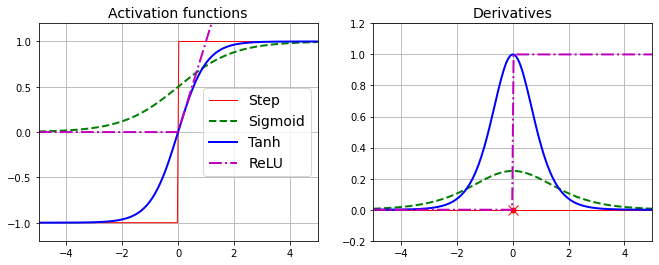

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

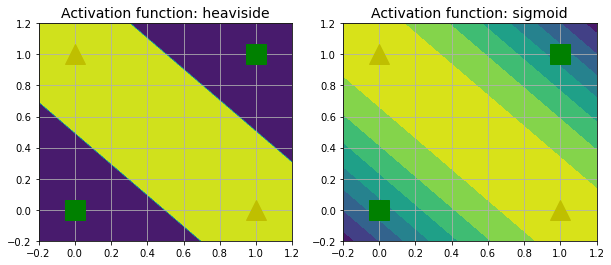

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

¡OK! Ahora sabemos de dónde vienen las redes neuronales, cuál es su arquitectura y cómo calcular sus salidas, y también hemos aprendido el algoritmo de propagación hacia atrás. Pero, ¿qué podemos hacer exactamente con ellas?

## MLPs de regresión

En primer lugar, los MLPs se pueden usar en tareas de regresión. Si queremos predecir un único valor (por ejemplo, el precio de una vivienda dadas muchas de sus características), entonces solo necesitamos una única neurona de salida: su salida es el valor predicho. Para regresión multivariable (es decir, predecir múltiples valores a la vez), necesitamos una neurona de salida por cada dimensión de salida. Por ejemplo, para localizar el centro de un objeto en una imagen necesitamos predecir coordenadas 2D, por tanto, necesitamos dos neuronas de salida. Si también queremos situar una caja delimitadora alrededor del objeto, necesitaremos dos números más: el ancho y el alto del objeto. Por tanto, terminaremos con 4 neuronas de salida.

En general, cuando construimos un MLP para regresión, no queremos usar ninguna función de activación para las neuronas de salida, por lo que son libres de devolver cualquier rango de valores. Sin embargo, si queremos garantizar que la salida siempre sea positiva, entonces podemos usar la función de activación ReLU o la función de activación *softplus* en la capa de salida. Finalmente, si queremos garantizar que las predicciones caerán dentro de una rango de valores dado, podemos usar la función logística o la tangente hiperbólica, y escalar las etiquetas al rango apropiado: de 0 a 1 para la función logística, de -1 a 1 para la tangente hiperbólica.

Generalmente, la función de pérdida a usar durante el entrenamiento es el error cuadrático medio, pero si tenemos muchos valores atípicos en el conjunto de entrenamiento, podríamos preferir usar el error absoluto medio. Alternativamente, podemos usar la pérdida de Huber, que es una combinación de ambos.

---

La pérdida de Huber es cuadrática cuando el error es más pequeño que un umbral $\delta$ (normalmente 1), pero lineal cuando el error es mayor que $\delta$. Esto lo hace menos sensible a los valores atípicos que el error cuadrático medio y a menudo es más preciso y converge más rápidamente que el error absoluto medio.

---

A continuación, se muestra un resumen de la arquitectura típica de un MLP de regresión.

![regression_mlp](images/ch10/regresion_mlp.png)

## MLPs de clasificación

Los MLPs también pueden usarse en tareas de clasificación. Para un problema de clasificación binaria, solo necesitamos una única neurona de salida usando la función de activación logística: la salida será un número de 0 a 1, que podemos interpretar como la probabilidad estimada de la clase positiva. Obviamente, la probabilidad estimada de la clase negativa es igual a uno menos ese número.

Los MLPs también pueden manejar fácilmente tareas de clasificación binaria multietiqueta. Por ejemplo, podríamos tener un sistema de clasificación de email que predice si cada correo entrante es o no spam y, simultáneamente, predice si se trata de un email urgente o no urgente. En este caso, necesitaríamos dos neuronas de salida, ambas usando la función de activación logística: la primera devolvería la probabilidad de que el email sea spam y la segunda devolvería la probabilidad de que sea urgente. Más genéricamente, dedicaríamos una neurona de salida por cada clase positiva. Tengamos en cuenta que las probabilidades de salida no necesariamente se suman. Esto permite que el modelo devuelva cualquier combinación de etiquetas: podemos tener correo bueno no urgente, bueno urgente, spam no urgente e incluso spam urgente (aunque esto último probablemente sería un error).

Si cada instancia puede pertenecer solo a una única clase, de 3 ó más clases posibles (por ejemplo, clases 0 a 9 para la clasificación de imágenes de dígitos), necesitamos tener una neurona de salida por clase y deberíamos utilizar la función de activación *softmax* para la capa de salida completa. La función softmax (presentada en el capítulo 4) garantiza que todas las probabilidades estimadas se encuentran entre 0 y 1 y que sumen 1 (lo cual es necesario si las clases son exclusivas). Esto se denomina clasificación multiclase.

![mlp_classification](images/ch10/mlp_classification.png)

Con respecto a la función de pérdida, dado que estamos prediciendo distribuciones de probabilidad, la entropía cruzada (también llamada perdida logarítmica, ver capítulo 4) es normalmente una buena elección.

La siguiente tabla resume la arquitectura típica de un MLP de clasificación.

![mlp_classification_arq](images/ch10/mlp_classification_arqu.png)

---

Antes de seguir adelante, recomendamos realizar el ejercicio 1, al final del capítulo. Jugaremos con varias arquitecturas de redes neuronales y visualizaremos sus salidas usando *TensorFlow Playground*. Resultará muy útil para comprender mejor los MLPs, por ejemplo, los efectos de todos los hiperparámetros (número de capas y neuronas, funciones de activación y demás).

---

Ahora tenemos todos los conceptos que necesitamos para empezar implementando MLPs con Keras.

# Implementando MLPs con Keras

Keras es una API de Deep Learning de alto nivel que permite construir, entrenar, evaluar y ejecutar fácilmente todo tipo de redes neuronales. Su documentación (o especificación) está disponible en https://keras.io. La implementación de referencia también se denomina Keras, por lo que para evitar confusiones lo llamaremos keras-team (ya que está disponible en https://github.com/keras-team/keras). Fue desarrollado por François Chollet como parte de un proyecto de investigación (Proyecto ONEIROS - Open-ended Neuro-Electronic Intelligent Robot Operating System) y liberado como proyecto de open source en marzo de 2015. Rápidamente ganó popularidad debido a su facilidad de uso, flexibilidad y bonito diseño. Para ejecutar los cálculos pesados requeridos por las redes neuronales, el equipo de keras se basó en backend de cálculo. En la actualidad, podemos elegir entre tres librerías de deep learning de código abierto: TensorFlow, Microsoft Cognitive Toolkit (CNTK) y Theano.

Además, desde finales de 2016 se han liberado otras implementaciones. Ahora podemos ejecutar Keras en Apache MXNet, Core ML de Apple, Javascript o Typescript (ejecutar código Keras en un navegador web) o PlaidML (que se puede ejecutar en todo tipo de GPUs, no solo Nvidia). Además, TensorFlow ahora viene incluido con su propia implementación de Keras, llamada tf.keras. Solo admite TensorFlow como backend, pero tiene la ventaja de ofrecer algunas características extras muy útiles (ver la siguiente figura): por ejemplo, es compatible con la API de datos de TensorFlow, lo que permite cargar y preprocesar datos de una manera más fácil y eficiente. Por esta razón, usaremos tf.keras en este libro. Sin embargo, en este capítulo no usaremos ninguna de las características específicas de TensorFlow, por lo que el código debería ejecutarse correctamente en cualquier otra implementación de Keras (al menos en Python), con solo modificaciones menores, como cambiar los *import*.

![kear_impl](images/ch10/keras_impl.png)

Como tf.keras está incluido con TensorFlow, instalemos TensorFlow.

---

Para soporte GPU, necesitaremos instalar `tensorflow-gpu` en lugar de `tensorflow`, y existen otras librerías a instalar. Para más detalle, ver https://tensorflow.org/install/gpu.

---

In [10]:
# Vamos a comprobar la versión instalada

import tensorflow as tf
from tensorflow import keras

In [11]:
tf.__version__

'2.3.0'

In [12]:
keras.__version__

'2.4.0'

## Construir un clasificador de imágenes usando la API secuencial

En primer lugar, necesitamos cargar un dataset. Abordaremos el *MNIST Fashion*, que es un reemplazo directo del MNIST. Tiene exactamente el mismo formato que MNIST (70.000 imágenes en escala de grises de 28x28 píxeles cada una, con 10 clases), pero las imágenes representan elementos de moda, en lugar de dígitos escritos a mano, por lo que cada clase es más diversa y el problema resulta significativamente más desafiante que MNIST. Por ejemplo, un modelo lineal simple alcanza aproximadamente un 92% de precisión en MNIST y solo alrededor del 83% en el MNIST Fashion.

### Usando Keras para cargar el dataset

Keras proporciona algunas funciones útiles para cargar datasets comunes, incluyendo MNIST, MNIST Fashion, el dataset original de viviendas de California y más. Carguemos MNIST Fashion:

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Cuando cargamos MNIST o MNIST Fashion usando Keras en lugar de Scikit-Learn, una diferencia importante es que cada imagen está representada como una matriz de 28x28, en lugar de una matriz 1D de tamaño 784. Además, las intensidades de los píxeles están representadas como enteros (de 0 a 255), en lugar de floats (de 0.0 a 255.0). A continuación se muestra el tamaño y el tipo de los datos del conjunto de entrenamiento:

In [14]:
X_train_full.shape

(60000, 28, 28)

In [15]:
y_train_full.dtype

dtype('uint8')

Tengamos en cuenta que el dataset ya está dividido entre conjunto de entrenamiento y conjunto de prueba, pero no existe conjunto de validación, así que lo vamos a crear. Además, dado que vamos a entrenar la red neuronal usando descenso de gradiente, debemos escalar las características de entrada. Por simplicidad, vamos a escalar solo las intensidades de los píxeles al rango 0-1 dividiéndolas por 255.0 (esto también las convierte a floats):

In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Ahora podemos dibujar una imagen usando la función `imshow()` de Matplotlib, con un mapa de color `'binario'`:

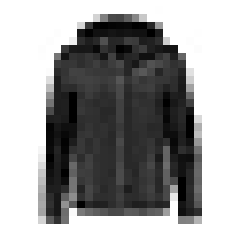

In [17]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Las etiquetas son los IDs de las clases (representados como enteros - uint8), del 0 al 9:

In [18]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Con MNIST, cuando la etiqueta es igual a 5, significa que la imagen representa el dígito 5 escrito a mano. Fácil. Sin embargo, para MNIST Fashion necesitamos listar los nombres de las clases para saber a qué nos estamos refiriendo:

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Por ejemplo, la primera imagen del conjunto de entrenamiento representa un abrigo:

In [20]:
class_names[y_train[0]]

'Coat'

El conjunto de validación contiene 5.000 imágenes y el conjunto de test 10.000 imágenes:

In [21]:
X_valid.shape

(5000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

Echemos un vistazo a un ejemplo de las imágenes del dataset:

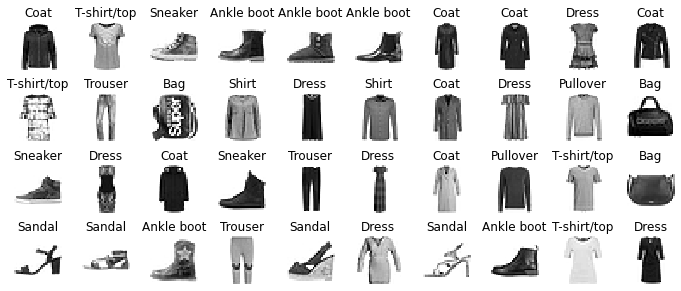

In [23]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creando el modelo usando la API secuencial

Ahora construyamos la red neuronal. Aquí tenemos un MLP de clasificación con dos capas ocultas:

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


Vamos a ir línea por línea:

+ La primera línea crea un modelo `Sequential`. Este es el modelo de Keras más simple para redes neuronales que solo están compuestas de una única pila de capas, conectadas secuencialmente. Esto se denomina API secuencial.

+ Despues, construimos la primera capa y la añadimos al modelo. Es una capa `Flatten` cuyo papel es simplemente covertir cada imagen de entrada en una matriz 1D: si recibe los datos de entrada X, calcula `X.reshape(-1, 1)`. Esta capa no tiene ningún parámetro, está ahí solo para hacer un simple preprocesamiento. Dado que es la primera capa del modelo, se debe especificar el `input_shape`: no incluye el tamaño del lote, solo la forma de las instancias. Alternativamente, podríamos agregar un `keras.layers.InputLayer` como primera capa, estableciéndo `shape=[28,28]`.

+ Después añadimos una capa `Dense` con 300 neuronas. Usaremos la función de activación ReLU. Cada capa `Dense` gestiona su propia matriz de pesos, conteniendo todos los pesos de conexión entre las neuronas y sus entradas. También gestiona un vector de términos de sesgos (uno por neurona). Cuando recibe algún dato de entrada, calcula la ecuación que vimos anteriormente: $h_{W, b}(X) = \phi(XW + b)$

+ Lo siguiente añadimos una segunda capa `Dense` oculta con 100 neuronas, también usando la función de activación ReLU.

+ Finalmente, añadimos una capa `Dense` de salida con 10 neuronas (una por clase), usando la función de activación softmax (porque las clases son exlusivas).

---

Especificar `activation="relu"` es equivalente a `activation=keras.activations.relu`. Existen otras funciones de activación disponibles en el paquete `keras.activations.relu`, usaremos muchas de ellas en este libro. Para un listado completo ver https://keras.io/activations/.

---

En lugar de añadir las capas una por una como hemos hecho, podemos pasar un listado de capas cuando creemos el modelo `Sequential`:

In [25]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

---

**Uso de ejemplos de código de keras.io**

Los ejemplos de código documentados en keras.io funcionarán correctamente con tf.keras, pero necesitarás cambiar los import. Por ejemplo, si consideramos el siguiente código de keras.io:

    from keras.layers import Dense
    output_layer = Dense(10)
    
Debemos cambias los import de la siguiente forma:

    from tensorflow.keras.layers import Dense
    output_layer = Dense(10)
    
O simplemente usar full path:

    from tensorflow import keras
    output_layer = keras.layers.Dense(10)
    
Esto es más detallado, pero usaremos este enfoque en este libro para que veamos fácilmente cuáles son lo paquetes que estamos usando y evitar la confusión entre las clases estándar y las clases personalizadas. En código de producción es lo que utiliza la mayoría de la gente.

---

El método `summary()` del modelo muestra todas las capas del modelo (*también podemos generar una imagen de nuestro modelo usando `keras.util.plot.model()`*), incluyendo el nombre de cada capa (que se genera automáticamente, a menos que se establezca cuando se crea la capa), su forma de salida (`None` significa que el tamaño del lote puede ser cualquiera) y su número de parámetros. El resumen termina con el número total de parámetros, incluyendo los parámetros entrenables y no entrenables. Aquí solo tenemos parámetros entrenables (más adelante en otros capítulos veremos ejemplos de parámetros no entrenables):

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


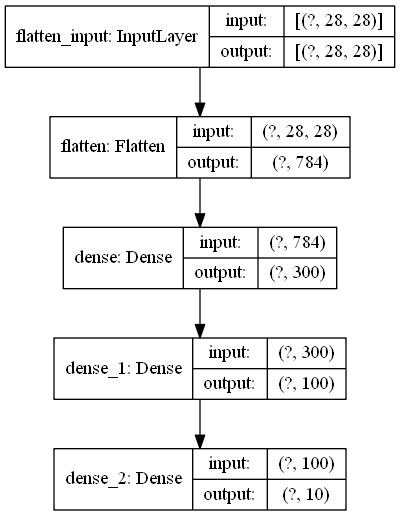

In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Observemos que las capas `Dense` a menudo tienen muchos parámetros. Por ejemplo, la primera capa oculta tiene 784 x 300 pesos de conexión, más 300 términos de sesgo, lo que suma hasta 235.000 parámetros. Esto le da al modelo bastante flexibilidad para adaptarse a los datos de entrenamiento, pero también significa que el modelo corre el riesgo de sufrir sobreajuste, especialmente cuando no tiene muchos datos de entrenamiento. Volveremos a esto más tarde.

Podemos obtener fácilmente la lista de capas del modelo, accediendo por su índice o por su nombre:

In [29]:
model.layers

In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [31]:
model.get_layer("dense_2").name

'dense_2'

Todos los parámetros de una capa son accesibles usando los métodos `get_weights()` y `set_weights()`. Para una capa `Dense` esto incluye tanto los pesos de conexión como los términos de sesgo:

In [32]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

Observemos que la capa `Dense` está inicializada con pesos de conexión aleatorios (necesario para romper la simetría, como vimos anterioresmente) y que los sesgos son inicializados a ceros, lo que es correcto. Si quisiéramos utilizar un método de inicialización diferente, podemos establecer `kernel_initializer` (*kernel* es otro nombre para la matriz de pesos de conexión) o `bias_initializer` cuando creamos la capa. Hablaremos sobre los inicializadores en otros capítulos, pero si queremos ver un listado completo de inicializadores por ir a https://keras.io/initializers/.

---

La forma de la matriz de pesos depende del número de entradas. Esto es por lo que es recomendable especificar `input_shape` cuando creamos la primera capa en un modelo `Sequential`. Sin embargo, si no lo especificamos, está bien: Keras simplemente esperará hasta conocer el tamaño de entrada antes de construir realmente el modelo. Esto sucederá tanto cuando le proporcionemos datos reales (por ejemplo, durante el entrenamiento) o cuando llamemos al método `build()`. Hasta que el modelo sea realmente construido, las capas no tendrán ningún peso y no serán capaces de hacer ciertas cosas (como mostrar el resumen del modelo o salvar el modelo), así que si sabemos el tamaño de la entrada cuando creamos el modelo es mejor especificarlo.

---

### Compilar el modelo

Después de crear el modelo, debemos llamar al método `compile()` para especificar la función de pérdida y el optimizador a usar. Opcionalmente, también podemos especificar una lista de métricas extras a calcular durante el entrenamiento y la evaluación:

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

---

Usar `loss="sparse_categorical_crossentropy"` es equivalente a `loss=keras.losses.sparse_categorical_crossentropy`. De forma similar, `optimizer="sgd"` es equivalente a `optimizer=keras.optimizers.SGD()` y `metrics=["accuracy"]` es equivalente a `metrics=[keras.metrics.sparse_categorical_accuracy]` (cuando usamos esta pérdida). Usaremos otras muchas pérdidas, optimizadores y métricas, pero para una lista completa ver: https://keras.io/losses/, https://keras.io/optimizers/ y https://keras.io/metrics/.

---

Esto requiere alguna explicación. En primer lugar, usamos la pérdida `"sparse_categorical_crossentropy"` porque tenemos etiquetas dispersas (es decir, por cada instancia hay solo un índice de clase objetivo, de 0 a 9 en este caso) y las clases son exclusivas. Si en cambio tuviéramos una probabilidad objetivo por clase por cada instancia (tal como vectores one-hot, es decir, `[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]` para representar la clase 3), entonces necesitaríamos usar en su lugar la pérdida `"categorical_crossentropy"`. Si hiciéramos clasificación binaria (con una o más etiquetas binarias) entonces tendríamos que usar la función de activación `"sigmoid"` (es decir, logística) en la capa de salida, en lugar de la función de activiación `"softmax"` y usaríamos la pérdida `"binary_crossentropy"`. 

---

Si queremos convertir etiquetas dispersas (es decir, índices de clases) a vectores one-hot, podemos usar la función `keras.utils.to_categorical()`. Para convertir al revés, podemos usar la función `np.argmax()` con `axis=1`.

---

En segundo lugar, con respecto al optimizador, `"sgd"` significa simplemente que entraremos el modelo usando Descenso de Gradiente Estocástico. En otras palabras, Keras ejecutará el algoritmo de propagación hacia atrás descrito anteriormente. 

Finalmente, dado que esto es un clasificador, es útil medir su `"accuracy"` durante el entrenamiento y evaluación.

### Entrenamiento y evaluación del modelo

Ahora el modelo está listo para ser entrenado. Para ello, simplemente necesitamos llamar a su método `fit()`. Pasamos sus características de entrada (`X_train`) y las clases objetivo (`y_train`), así como el número de ciclos de entrenamiento (o si no, por defecto será solo 1, lo que definitivamente no será suficiente para converger a un buena solución). También pasamos un conjunto de validación (esto es opcional): Keras medirá la pérdida y las métricas extras en este conjunto al término de cada ciclo, lo que resulta muy útil para ver realmente cómo de bien se está ejecutando el modelo: si la ejecución en el conjunto de entrenamiento es mucho mejor que en el conjunto de validación, probablemente nuestro modelo estará sobreajustado al conjunto de entrenamiento (o existe un bug, como datos no coincidentes entre el conjunto de entrenamiento y el de validación):

In [37]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4842 - accuracy: 0.8316 - val_loss: 0.4351 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4391 - accuracy: 0.8455 - val_loss: 0.5269 - val_accuracy: 0.8008
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4123 - accuracy: 0.8567 - val_loss: 0.3915 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3939 - accuracy: 0.8620 - val_loss: 0.3746 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3750 - accuracy: 0.8675 - val_loss: 0.3710 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3630 - accuracy: 0.8713 - val_loss: 0.3617 - val_accuracy:

¡Y esto es! La red neuronal está entrenada. En cada ciclo durante el entrenamiento, Keras muestra el número de instancias procesadas hasta ahora (con una barra de progreso), el tiempo entrenamiento promedio por ejemplo, la pérdida y la precisión (o cualquier otra métrica extra que hayamos indicado), tanto en el conjunto de entrenamiento como en el de validación. Podemos ver que la pérdida de entrenamiento disminuyó, lo que es buena señal y la precisión de validación alcanzó 89,32% tras 30 ciclos, no demasiado lejos de la precisión de entrenamiento, por lo que no parece haber mucho sobreajuste.

---

En lugar de pasar un conjunto de validación usando el argumento `validation_data`, podemos establecer en su lugar `validation_split` al ratio del conjunto de entrenamiento que queremos que use Keras para validación (por ejemplo, 0.1).

---

In [38]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Si el conjunto de entrenamiento estaba muy sesgado, con algunas clases sobrerepresentadas y otras subrepresentadas, sería útil establecer el argumento `class_weight` cuando llamamos al método `fit()`, proporcionando un mayor peso a las clases subrepresentadas y un menor peso a las clases sobrerepresentadas- Estos pesos serían usados por Keras cuando calcula la pérdida. Si en cambio necesitamos pesos por instancia, podemos establecer el argumento `sample_weight` (reemplaza a `class_weight`). Esto podría ser útil por ejemplo si algunas instancias fueron etiquetas por expertos mientras que otras fueron etiquetadas usando una plataforma de crowdsourcing: es posible que queramos dar más peso a las primeras. También podemos suministrar pesos de muestra (no pesos de clase) para el conjunto de validación añadiendo un tercer ítem en la tupla `validation_data`.

El método `fit()` devuelve un objeto `History` conteniendo los parámetros de entrenamiento (`history.params`), la lista de ciclos por lo que ha pasado (`history.epoch`) y. más importante, un diccionario (`history.history`) conteniendo las pérdidas y métricas extras medidas al término de cada ciclo en el conjunto de entrenamiento y en el conjunto de validación (si lo hubiera). Si creamos un DataFrame de Pandas usando este diccionario y llamamos a su método `plot()` obtendríamos las curvas de aprendizaje mostrada en la siguiente figura.

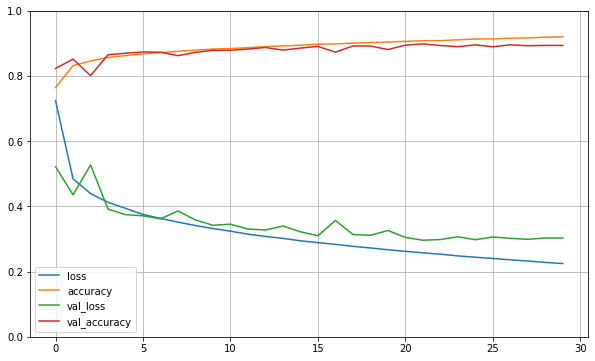

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

Podemos ver que tanto la precisión del entrenamiento como de la validación aumentan durante el entrenamiento, mientras que la pérdida de ambos disminuye. ¡Bien! Además, las curvas de validación están bastante cerca de las curvas de entrenamiento, lo que significa que no hay demasiado sobreajuste. En este caso particular, el modelo funcionó mejor en el conjunto de validación que en el conjunto de entrenamiento al comienzo del entrenamiento: esto a veces sucede por casualidad (especialmente cuando el conjunto de validación es bastante pequeño). Sin embargo, el rendimiento del conjunto de entrenamiento termina superando el rendimiento de validación, como suele ser el caso cuando se entrena durante el tiempo suficiente. Puede decirse que el modelo aún no ha convergido del todo, ya que la pérdida de validación aún está disminuyendo, por lo que probablemente deberíamos continuar entrenando. Es tan simple como volver a llamar al método `fit()`, ya que Keras simplemente continúa entrenando donde lo dejó (debería poder alcanzar una precisión de validación cercana al 89%).

Si no estamos satisfechos con el rendimiento de nuestro modelo, podemos volver atra´s y ajustar los hiperparámetros del modelo, por ejemplo, el número de capas, el número de neuronas por capa, los tipos de las funciones de activación que usamos para cada capa oculta, el número de ciclos de entrenamiento, el tamaño del lote (puede establecerse en el método `fit()` usando el argumento `batch_size`, siendo por defecto 32). Volveremos atrás para ajustar los hiperparámetros al final del capítulo. Una vez que estamos satisfechos con la precisión de validación de nuestro modelo, debemos evaluarlo en el conjunto de prueba para estimar el error de generalización antes de desplegarlo en producción. Podemos hacer esto fácilmente usando el método `evaluate()` (también admite otros argumentos, como `batch_size` o `sample_weight`, etc.)

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 764us/step - loss: 0.3366 - accuracy: 0.8826


[0.3366280198097229, 0.8826000094413757]

Como vimos en el capítulo 2, es normal obtener una ejecución ligeramente inferior en el conjunto de prueba que en conjunto de validación, debido a que los hiperparámetros se han ajustado en el conjunto de validación, no en el de prueba (sin embargo, en este ejemplo, no hemos hecho ningún ajuste todavía, así que la menor precisión es solo mala suerte). Recordemos que debemos resistirnos a la tentación de ajustar los hiperparámetros en el conjunto de prueba o si no nuestra estimación del error de generalización será demasiado optimista.

### Usando el modelo para hacer predicciones

Después, podemos usar el método `predic()` del modelo para hacer predicciones en nuevas instancias. Dado que no tenemos realmente nuevas instancias, usaremos las 3 primeras instancias del conjunto de prueba:

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Como podemos ver, para cada instancia del modelo estima una probabilidad por clase, desde la clase 0 a la clase 9. Por ejemplo, para la primera imagen estima que la probabilidad de clase 9 (botines) es 96%, la probabilidad de la clase 7 (zapatillas) es 2%, la probabilidad de la clase 5 (sandalias) es 1% y para las otras clases es despreciable. En otras palabras, "cree" que es un zapato, probablemente botines, pero no está completametne seguro. Si solo nos importa la clase con la probabilidad estimada más alta (incluso aunque esta probabilidad fuera bastante baja) entonces podemos usar el método `predict_classes()`:

In [44]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

Y realmente el clasificador ha clasificado las tres imágenes correctamente:

In [45]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

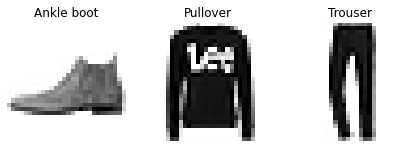

In [46]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Ahora sabemos cómo construir, entrenar, evaluar y usar un MLP de clasificación usando la API Secuencial. Pero, ¿que pasa con la regresión?

## Construyendo un MLP de regresión usando la API Secuencial

Vamos a cambiar al problema de la vivienda de California y abordarlo usando una red reuronal de regresión. Por simplicidad, usaremos la función `fetch_california_housing()` de Scikit-Learn para cargar los datos: este dataset es más simple que el que usamos en el capítulo 2, dado que solo contiene caractarísticas numéricas (no existe la característica `ocean_proximity`) y no hay valores ausentes. Después de cargar los datos, los dividiremos en un conjunto de entrenamiento, de validación y de prueba, y escalaremos todas las características:

In [47]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Construir, entrenar, evaluar y usar un MLP de regresión usando API secuencia para hacer predicciones es bastante similar a lo que hicimos para la clasificación. La principal diferencia es el hecho de que la capa de salida tiene una única neurona (dado que solo queremos predecir un único valor) y no utiliza función de activación, y la función de pérdida es el error cuadrático medio. Dado que el dataset es bastante ruidoso, usaremos una única capa oculta con menos neuronas que antes, para evitar el sobreajuste:

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 821us/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 598us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 598us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 584us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 592us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 581us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 590us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 581us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 617us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 636us/step - loss: 0.487

Como podemos ver, el API secuencial es bastante fácil de usar. Sin embargo, a pesar de que los modelos secuenciales son extremadamente comunes, algunas veces es útil construir redes neuronales con topologías más complejas o con múltiples entradas o salidas. Para este propósito, Keras ofrece la API Funcional.

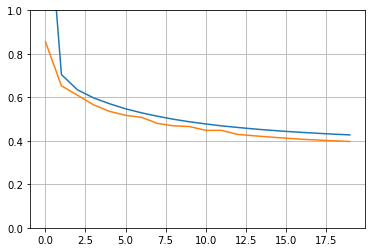

In [50]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
y_pred

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)

## Construyendo modelos complejos usando la API Funcional

Un ejemplo de red neuronal no secuencial es una red neuronal *Wide & Deep*. Esta arquitectura de red reuronal fue presentanda por Heng-Tze Cheng en su [artículo de 2016](https://arxiv.org/abs/1606.07792). Conecta todas o parte de las entradas directamente a la capa de salida, como se muestra en la siguiente figura. Esta arquitectura posibilita que las redes neuronables aprendan tanto patrones profundos (usando rutas profundas) como reglas simples (a través de rutas cortas). Por el contario, un MLP regular fuerza que todos los datos fluyan a través de la pila completa de capas, por lo que patrones simples en los datos pueden terminar distorsionados por esta secuencia de transformaciones.

![wide_deep_network](images/ch10/wide_deep_network.png)

Vamos a construir dicha red neuronal para abordar el problema de la vivienda de California:

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

Vayamos línea a línea de este código:

+ Primero, necesitamos crear un objeto `Input`. Esto es necesario porque podemos tener múltiples entradas, como veremos más adelante.

+ Despues, creamos una capa `Dense` con 30 neuronas y usamos la función de activación ReLU. Tan pronto como es creada, observemos que la llamamos como una función, pasándole la entrada. Esto es por lo que se la denomina API Funcional. Observemos que solo le estamos diciendo a Keras cómo conectar las capas juntas, todavía no se están procesando datos reales.

+ Entonces creamos una segunda capa oculta y de nuevo la usamos como una función. Observemos, sin embargo, que le pasamos la salida de la primera capa oculta.

+ Después, creamos una capa `Concatenate()` y de nuevo la usamos inmediatamente como una función para concatenar la entrada y la salida de la segunda capa oculta (podríamos preferir la función `keras.layers.concatenate()` que crea una capa `Concatenate` e inmediatamente la llama con las entradas dadas).

+ Después creamos la capa de salida, con una única neurona y sin función de activación, y la llamamos como una función, pasándole el resultado de la concatenación.

+ Por último, creamos un `Model` Keras, especificando tanto las entradas como las salidas a usar.

In [54]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]         

Una vez que hemos construido el modelo Keras, es exactamente igual que anteriormente, por lo que no es necesario repetirlo aquí: debemos compilar el modelo, entrenarlo, evaluarlo y hacer predicciones.

In [55]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 879us/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 664us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 669us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 650us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 653us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 653us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 661us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 678us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 656us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 631us/step - loss: 0.465

Pero qué pasa si queremos enviar un subconjunto de las características a través de la ruta corta y un subconjunto diferente (posiblemente superpuesto) a través de la ruta profunda (véase la siguiente figura). En este caso, una solución es usar múltiples entradas. Por ejemplo, supongamos que queremos enviar 5 características a través de la ruta profunda (características 0 a 4) y 6 características a través de la ruta corta (caractarísticas 2 a 7):

![multiple_inputs](images/ch10/multiple_inputs.png)

In [56]:
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

El código es autoexplicativo. Observemos que especificamos `inputs=[input_A, input_B]` cuando creamos el modelo. Ahora podemos compilar el modelo como de costumbre, pero cuando llamamos al método `fit()`, en lugar de pasar una única matriz de entrada `X_train`, debemos pasar un par de matrices `(X_train_A, X_train_B)`: una por entrada. Lo mismo  para `X_valid`, y para `X_test` y `X_new` cuando llamamos a `evalueate()` o `predict()`:

In [58]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 672us/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 675us/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 686us/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 675us/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 694us/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 664us/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 650us/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 650us/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 680us/step - loss: 0.4644 

Existen muchos casos de uso en los cuales querríamos tener múltiples salidas:

+ La tarea puede demandarlo, por ejemplo, podemos querer localizar y clasificar el objeto principal de una fotografía. Esto es tanto una tarea de regresión (encontrar las coordenadas del centro del objeto, así como su ancho y alto) y una tarea de clasificación.

+ De forma similar, podríamos tener que ejecutar múltiples tareas independientes basadas en los mismos datos. Claro, podríamos entrenar una red neuronal por tarea, pero en la mayoría de los casos obtendremos mejores resultados en todas las tareas entrenando una única red neuronal con una salida por tarea. Esto es debido a que la red neuronal puede aprender características en los datos que son útiles para el resto de tareas.

+ Otro caso de uso es una técnica de regularización (es decir, una restricción de entrenamiento cuyo objetivo es reducir el sobreajuste y, por tanto, mejorar la habilidad del modelo para generalizar). Por ejemplo, podríamos añadir algunas salidas auxiliares en una arquitectura de red neuronal (ver la siguiente figura) para asegurar que la parte subyacente de la red aprende algo útil por sí misma, sin depender del resto de la red.

![auxiliar_output_regularization](images/ch10/auxiliar_output_regularization.png)

Añadir salidas extra es bastante fácil: solo hay que conectarlas a las capas apropiadas y añadirlas a la lista de salidas de nuestro modelo. Por ejemplo, el código siguiente construye la red representada en la figura anterior:

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

Cada salida necesitará su propia función de pérdida, por lo tanto cuando compilemos el modelo debemos pasarle una lista de pérdidas (si pasamos una única pérdida, Keras asumirá que se debe usar la misma pérdida para todas las salidas). Por defecto, Keras calculará todas esas pérdidas y simplemente las sumará para obtener la pérdida final utilizada para el entrenamiento. Sin embargo, nos importa mucho más la salida principal que la salida auxiliar (ya que solo se usa para regularización), por lo que queremos darle a la pérdida de la salida principal un peso mucho mayor. Por suerte, es posible establecer todos los pesos de pérdida cuando compilamos el modelo:

In [61]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

Ahora cuando entrenemos el modelo, necesitamos proporcionarle algunas etiquetas para cada salida. En este ejemplo, la salida principal y la auxiliar deben intentar predecir lo mismo, por lo que deben usar las mismas etiquetas. En lugar de pasar `y_train`, necesitaremos pasar `(y_train, y_train)` (y lo mismo para `y_valid` e `y_test`):

In [62]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 741us/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 749us/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 777us/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 741us/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - 

Cuando evaluamos el modelo, Keras devolverá la pérdida total, así como las pérdidas individuales. De forma similar, el método `predict()` devolverá las predicciones para cada salida:

In [63]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 506us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


In [64]:
y_pred_main

array([[0.26762432],
       [1.9807628 ],
       [3.3396287 ]], dtype=float32)

In [65]:
y_pred_aux

array([[0.9593649],
       [1.9240992],
       [2.5152814]], dtype=float32)

Como podemos ver, podemos construir cualquier tipo de arquitectura que queramos de forma bastante fácil con la API Funcional. Echemos un vistazo a la última forma en que podemos construir modelos de Keras.

## Construyendo modelos dinámicos usando la API Subclases

Tanto la API Secuencial como la APU Funcional son declarativas: empezamos declarando cuántas capas queremos usar y cómo deben conectarse, y solo entonces podemos empezar a alimentar el modelo con datos para entrenamiento o inferencia. Esto tiene muchas ventajas: el modelo puede ser salvado, clonado y compartido fácilmente; su estructura se puede mostrar y analizar, el framework puede inferir formas y comprobar tipos, así los errores se pueden detectar con mayor anticipación (es decir, antes de que los datos pasen por el modelo). También es bastante fácil de depurar, dado que todo el modelo completo es solo un gráfico estático de capas. Pero la otra cara es precisamente esa: es estático. Algunos modelos incluyen bucles, formas variables, ramificaciones condicionales y otros tipos de comportamiento dinámico. Para tales casos, o simplemente si preferimos un estilo de programación más imperativo, la API Subclases está para nosotros.

Simplemente creamos una subclase de la clase `Model`, creamos las capas que necesitamos en el constructor y la usamos para ejecutar los cálculos que queremos en el método `call()`. Por ejemplo, creando una instancia de la clase siguiente `WideAndDeepModel` obtenemos un modelo equivalente al que hemos construido con la API Funcional. Entonces podemos compilarlo, evaluarlo y usarlo para hacer predicciones, exactamente como hicimos.

In [66]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [67]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4718 - main_output_loss: 0.4222 - aux_output_loss: 0.9186 - val_loss: 0.4452 - val_main_output_loss: 0.3892 - val_aux_output_loss: 0.9487
Epoch 2/10
363/363 [==============================] - 0s 730us/step - loss: 0.4690 - main_output_loss: 0.4208 - aux_output_loss: 0.9028 - val_loss: 0.4523 - val_main_output_loss: 0.3997 - val_aux_output_loss: 0.9252
Epoch 3/10
363/363 [==============================] - 0s 744us/step - loss: 0.4662 - main_output_loss: 0.4194 - aux_output_loss: 0.8881 - val_loss: 0.4416 - val_main_output_loss: 0.3915 - val_aux_output_loss: 0.8931
Epoch 4/10
363/363 [==============================] - 0s 738us/step - loss: 0.4627 - main_output_loss: 0.4169 - aux_output_loss: 0.8748 - val_loss: 0.4422 - val_main_output_loss: 0.3948 - val_aux_output_loss: 0.8696
Epoch 5/10
363/363 [==============================] - 0s 727us/step - loss: 0.4608 - main_output_loss: 0.4164 - aux_output_loss: 0.8609 - 

In [68]:
model = WideAndDeepModel(30, activation="relu")

Este ejemplo se parece mucho a la API Funcional, excepto que no necesitamos crear las entradas, solo usamos el argumento `input` para el método `call()` y separamos la creación de las capas en el constructor de su uso en el método `call()` (*Los modelos de Keras tienen una atributo `output`, por tanto no podemos utilizar este nombre para la capa de salida principal, que es por lo que la renombramos a `main_output`*). Sin embargo, la gran diferencia es que podemos hacer prácticamente todo lo que queramos en el método `call()`: bucles `for`, sentencias `if`, operaciones de TensorFlow de bajo nivel, nuestro límite es nuestra imaginación. Esto la hace una fantástica API para que los investigadores experimenten con nuevas ideas.

Sin embargo, esta flexibilidad extra viene con un coste: la arquitectura del modelo está oculta dentro del método `call()`, por lo que Keras no puede inspeccionarlo fácilmente, no puede salvarlo o clonarlo, y cuando llamamos al método `summary()` solo obtendremos una lista de capas, sin ninguna información de cómo están conectadas. Además, Keras no puede comprobar tipos ni formas antes de tiempo y es fácil cometer errores. Por tanto, a menos que necesitemos realmente esta flexibilidad extra, deberíamos ceñirnos a la API Secuencia o Funcional.

---

Los modelos de Keras pueden usarse como capas regulares, por lo que podemos combinarlos fácilmente para construir arquitecturas complejas.

---

Ahora que sabemos cómo construir y entrenar redes neuronales usando Keras, queremos salvarlas.

## Salvar y restaurar un modelo

Salvar un modelo entrenado de Keras es tan simple como esto:

    model.save("my_keras_model.h5")

In [69]:
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [71]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 837us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 606us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 598us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 592us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 609us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 595us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 595us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 598us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 620us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 395us/step - loss: 0.438

In [72]:
model.save("my_keras_model.h5")

Keras guardará tanto la arquitectura del modelo (incluyendo los hiperparámetros de cada capa) como los valores de todos los parámetros del modelo de cada capa (es decir, pesos de conexión y sesgos), usando el formato HDF5. También guarda el optimizador (incluyendo sus hiperparámetros y cualquier estado que puedan tener).

Normalmente tendremos un script que entrena un modelo y lo guarda, y uno o más scripts (o servicios web) que cargan el modelo y lo usan para hacer predicciones. Cargar el modelo es tan fácil como:

In [73]:
model = keras.models.load_model("my_keras_model.h5")

In [74]:
model.predict(X_new)

array([[0.5400236],
       [1.6505969],
       [3.0098243]], dtype=float32)

---

Esto funcionará bien cuando usemos API Secuencial o Funcional, pero desafortunadamente no cuando usemos subclases de Model. Sin embargo, podemos usar **`save_weights()`** y **`load_weights()`** para al menos guardar y restaurar los parámetros del modelo (pero deberemos guardar y restaurar todo lo demás por nosotros mismos).

---

In [75]:
model.save_weights("my_keras_weights.ckpt")

In [76]:
model.load_weights("my_keras_weights.ckpt")

Pero, ¿y si el entrenamiento dura varias horas? Esto es muy común, especialmente cuando entrenamos datasets grandes. En este caso, no solo debemos salvar nuestro modelo al final del entrenamiento sino también guardar puntos de control a intervalos regulares durante el entrenamiento. Pero, ¿cómo podemos decirle al método `fit()` que guarde puntos de control? La respuesta es usando callbacks.

## Uso de Callback

El método `fit()` acepta un argumento `callbacks` que nos permite especificar una lista de objetos a los que Keras llamará durante el entrenamiento, al principio y al final del mismo, y al principio y al final de cada ciclo e incluso antes y después de procesar cada lote. Por ejemplo, el callback `ModelCheckpoint` guarda los puntos de control de nuestro modelo a intervales regulares durante el entrenamiento, por defecto al final de cada ciclo.

Además, si usamos un conjunto de validación durante el entrenamiento, podemos establecer `save_best_only=True` cuando creamos el `ModelCheckpoint`. En este caso, solo guardará nuestro modelo cuando su ejecución en el conjunto de validación sea el mejor hasta el momento. De esta forma, no necesitamos preocuparnos porque el entrenamiento dure demasiado y sobreajustar el conjunto de entrenamiento: simplemente restauramos el último modelo guardado tras el entrenamiento y este será el mejor modelo en el conjunto de validación. Esta es una manera sencilla de implementar detención temprana (presentada en el capítulo 4):

In [77]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [79]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", 
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 854us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 628us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 623us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 623us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 645us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 614us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 631us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 631us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 645us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 395us/step - loss: 0.438

Otra forma de implementar la detención temprana es utilizar simplemente el callback `EarlyStopping`. Interrumpirá el entrenamiento cuando no detecte progreso en el conjunto de validación durante un número de ciclos (definido por el argumento `patience`) y, opcionalmente, volverá al mejor modelo. Podemos combinar ambos callbacks para guardar checkpoints de nuestro modelo (en el caso de que nuesto ordenador sufra una caida del sistema) e interrumpir el entrenamiento prematuramente cuando no existe más progreso (evitando gastar tiempo y recursos):

In [80]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 857us/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 620us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 639us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 631us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 647us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 647us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 658us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 653us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 647us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 650us/step - l

El número de ciclos se puede establecer a un valor alto, dado que el entrenamiento se detendrá automáticamente cuando no haya progreso. En este caso, no es necesario restaurar el mejor modelo guardado puesto que el callback `EarlyStopping` mantendrá los mejores pesos y los restaurará por nosotros al final del entrenamiento.

---

Existe muchos otros callbacks disponibles en el [`paquete keras.callbacks`](https://keras.io/callbacks/).

---

Si necesitamos un control extra, podemos escribir fácilmente nuestros propios callbacks personalizados. Como ejemplo de cómo hacer esto, el siguiente callback personalizado mostrará el ratio entre la pérdida de validación y la pérdida de entrenamiento durante el entrenamiento (por ejemplo, para detectar el sobreajuste):

In [81]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [82]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

322/363 [=========================>....] - ETA: 0s - loss: 0.3296
val/train: 1.08
363/363 [==============================] - 0s 697us/step - loss: 0.3302 - val_loss: 0.3556


Como cabría esperar, podemos implementar `on_train_begin()`, `on_train_end()`, `on_epoch_begin()`, `on_epoch_end()`, `on_batch_begin()` y `on_batch_end()`. Los callbacks también se pueden usar durante la evaluación y predicción, en el caso de que los necesites. Para la evaluación debemos implementar `on_test_begin()`, `on_test_end()`, `on_test_batch_begin()` o `on_test_batch_end()` (llamados por `evaluate()`); y para la predicción debemos implementar `on_predict_begin()`, `on_predict_end()`, `on_predict_batch_begin()` o `on_predict_batch_end()` (llamados por `predict()`).

Ahora echemos un vistazo a una herramienta más que sin lugar a dudas deberíamos tener en nuestra caja de herramientas cuando usemos tf.keras: TensorBoard.

## Uso de TensorBoard para visualización

TensorBoard es una gran herramienta de visualización interactiva que podemos usar para visualizar las curvas de aprendizaje durante el entrenamiento, comparar curvas de aprendizaje entre múltiples ejecuciones, visualizar el gráfico de cálculo, analizar estadísticas de entrenamiento, visualizar imágenes generadas por nuestro modelo, visualizar datos multidimensionales complejos proyectados en 3D y clusterizados automáticamente para nosotros, etc. Esta herramienta se instala automáticamente al instalar TensorFlow, por lo que ya la tenemos.

Para utilizarla, debemos modificar el programa que devuelve la salida de los datos que queremos visualizar a unos archivos de log binarios especiales denominados *archivos de eventos*. Cada registro de datos binarios se denomina un *resumen* (*summary*). El servidor de TensorBoard monitorizará el directorio de log y detectará automáticamente los cambios y actualizará las visualizaciones: esto permite visualizar datos en tiempo real (con un pequeño retardo), tales como curvas de aprendizaje durante el entrenamiento. En general, apuntaremos el servidor de TensorBoard a un directorio raíz de logs y configuraremos nuestro programa para escribir a un subdirectorio diferente cada vez que se ejecuta. De esta forma, la misma instancia de servidor de TensorBoard permitirá visualizar y comparar datos entre múltiples ejecuciones de nuestro programa, sin tenerlo todo mezclado.

Empezaremos definiendo el directorio raíz de logs que usaremos para nuestros logs de TensorBoard, más una pequeña función que generará un path de subdirectorio basado en la fecha y hora actuales, para que sea diferente en cada ejecución. También podríamos incluir información extra en el nombre del directorio de log, tales como valores de hiperparámetros que estamos probando, para hacer más fácil saber lo que estamos viendo en TensorBoard:

In [83]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [84]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2020_08_27-13_37_02'

Las buenas noticias es que Keras proporciona un bonito callback `TensorBoard()`:

In [85]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [87]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 7.8215WARNING:tensorflow:From C:\Program Files\Python38\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 0s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 645us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 617us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 625us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 669us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 639us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [======================

¡Y eso es todo lo que hay que hacer! No puede ser más sencillo. Al ejecutar este código, el callback `TensorBoard()` se encargará de crear el directorio de log por nosotros y durante el entrenamiento creará los ficheros de eventos y escribirá los resúmenes en ellos. Tras ejecutar el programa una segunda vez (quizás cambiando algunos valores de hiperparámetros), terminaremos con una estructura de directorios simiar a esta:

![directory_structure](images/ch10/directory_structure.png)

Existe un directorio por ejecución, cada uno conteniendo un subdirectorio para los logs de entrenamiento y otro para los de validación. Ambos contiene ficheros de eventos, pero los logs de entrenamiento también incluyen trazas que permiten a TensorBoard mostrarnos exactamente cuánto tiempo dedica el modelo en cada parte de nuestro modelo, a través de todos los disposivos, lo cual está fenomenal para localizar cuellos de botella en el rendimiento.

Lo siguiente que necesitamos es iniciar el servidor de TensorBoard. Una forma de hacer esto es ejecutar un comando un terminal. Si hemos instalado TensorFlow dentro de un virtualenv, debermos activarlo. Después, ejecutamos el siguiente comando en la raíz del proyecto (o desde cualquier otro sitio siempre que apuntemos al directorio de log adecuado):

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

    TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)

Si el shell no puede encontrar el script *tensorboard*, deberemos cambiar nuestra variable de entorno PATH que contiene el directorio en el que se ha instalado el script (alternativamente, podemos reemplazar `tensorboard` en la línea de comando por `python -m tensorboard.main`). Una vez que se ha levantado el servidor, pordemos abrir un navegador web y acceder a [http://localhost:6006](http://localhost:6006)

También podemos usar TensorBoard directamente desde Jupyter, ejecutando los siguiente comandos. La primera línea carga la extensión de TensorBoard y la segunda inicia el servidor de TensorBoard en el puerto 6006 (a menos que ya esté iniciado) y lo conecta:

In [88]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 13344), started 1:52:21 ago. (Use '!kill 13344' to kill it.)

In [89]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2020_08_27-13_37_09'

In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [92]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5530 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 0s 675us/step - loss: 5292745216.0000 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 672us/step - loss: 1.3411 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 656us/step - loss: 1.3423 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 0s 661us/step - loss: 1.3423 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 636us/step - loss: 1.3431 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 0s 620us/step - loss: 1.3425 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 639us/step - loss: 1.3433 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 656us/step - loss: 1.3435 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 647us/step - lo

De cualquier de las formas deberíamos ver el interfaz web de TensorBoard. Pulsa en la pestaña SCALARS para ver las curvas de aprendizaje (ver la siguiente figura). En la parte inferior izquierda, selecciona los logs queremos visualizar (por ejemplo, los logs de entrenamiento de la primera y segunda ejecución) y selecciona el escalar `epoch_loss`. Vemos que la pérdida de entrenamiento disminuyó durante ambos ejecuciones, pero en la segunda ejecución fue mucho más rápida. De hecho, usamos una tasa de aprendizaje de 0.05 (`optimizer=keras.optimizer.SGD(lr=0.05)`), en lugar de 0.001.

![curves_tb](images/ch10/curves_tb.png)

También podemos visializar el grafo completo, los pesos aprendidos (proyectados en 3D) o las trazas. El callback `TensorBoard()` tiene opciones de datos extra en los logs.

Además, TensorFlow ofrece una API de bajo nivel en el paquete `tf.summary`. El código siguiente crear un `SummaryWriter` usando la función `create_file_writer()`, y usar este writer como un contexto para registrar escalares, histogramas, imágenes, audios y texto, todo aquellos que podamos visualizar usando TensorBoard

In [93]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

En realidad, esta es una herramienta de visualización útil a tener, incluso más allá de TensorFlow o Deep Learning.

Vamos a resumir lo que hemos aprendido hasta ahora en este capítulo: hemos visto de dónde vienen las redes neuronales, lo que es un perceptrón multicapa (MLP) y cómo se puede usar para clasificación y regresión, cómo usar la API Secuencial de tf.keras para construir MLPs y cómo usar las API Funcional y API Subclases para construir arquitecturas de modelos complejas. Hemos aprendido cómo guardar  y restaurar un modelo y cómo usar callbacks para realizar checkpoints, detención temprana, etc. Por último, hemos aprendido cómo usar TensorBoard para visualización. Ya estamos listos para seguir adelante y usar redes neuronales para abordar muchos problemas. Sin embargo, es posible que nos preguntemos cómo elegir el número adecuado de capas ocultas, el número de neuronas de la red y el resto de hiperparámetros. Veamos esto ahora.

# Ajuste de hiperparámetros de redes neuronales

La flexibilidad de las redes neuronales también es uno de sus inconvenientes: hay muchos hiperparámetros que ajustar. No solo podemos usar cualquier arquitectura de red imaginables, sino que incluso en un simple MLP podemos cambiar el número de capas, el número de neuronas por capa, el tipo de función de activación a utilizar en cada capa, la lógica de inicialización de pesos, etc. ¿Cómo podemos saber qué combinación de hiperparámetros en la mejor para nuestra tarea?

Una opción es simplemente probar muchas combinaciones de hiperparámetros y ver cuáles funcionan mejor en el conjunto de validación (o usar validación cruzada K-fold). Por ejemplo, podemos usar `GridSearchCV` o `RandomizedSearchCV` para explorar el espacio de hiperparámetros, como hicimos en el capítulo 2. Para hacer esto, necesitamos envolver nuestro modelos de Keras en objetos que imiten los regresones normales de Scikit-Learn. El primer paso es crear una función que construirá y compilará un modelo de Keras, dados un conjunto de hiperparámetros:

In [94]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [95]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Esta función crea un modelo `Sequential` simple para regresión univariable (solo una neurona de salida), con la forma de entrada dada y dado el número de capas ocultas y neuronas; y lo compila usando un optimizador SGD con la tasa de aprendizaje especificada. Es una buena práctica proporcionar tantos valores por defectos razonables como se pueda para la mayoría de los hiperparámetros, como hace Scikit-Learn.

Después, vamos a crear un `KerasRegressor` basado en esta función `build_model()`:

In [96]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

El objeto `KerasRegressor` es un pequeño envoltorio (wrapper) alrededor del modelo de Keras construido usando `build_model()`. Dado que no especificamos ningún hiperparámetros cuando lo creamos, usará los hiperparámetros por defecto definidos en `build_model()`. Ahora podemos usar este objeto como un regresor regular de Scikit-Learn: podemos entrenarlo usando el método `fit()`, después evaluarlo usando su método `score()` y usarlo para hacer predicciones usando su método `predict()`, como podemos ver en el código siguiente:

In [97]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 804us/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 595us/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 576us/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 606us/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 579us/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 587us/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 573us/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 601us/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 581us/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 589us/step - 

In [98]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 389us/step - loss: 0.3409


In [99]:
y_pred = keras_reg.predict(X_new)

Tengamos en cuenta que cualquier parámetro extra que pasemos al método `fit()` se pasará al modelo de Keras subyacente. También tengamos en cuenta que la puntuación será la opuesta al MSE debido a que Scikit-Learn quiere puntuaciones, no pérdidas (es decir, más alto es mejor).

No queremos entrenar y evaluar un único modelo como este, sino entrenar cientos de variantes y ver cuáles se ejecutan mejor en el conjunto de validación. Dado que existen muchos hiperparámetros, es preferible usar búsqueda aleatoria en lugar de grid search (como vimos en el capítulo 2). Vamos a intentar explorar el número de capas ocultas, el número de neuronas y la tasa de aprendizaje:

In [100]:
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 0s 971us/step - loss: 3.5557 - val_loss: 1.8752
Epoch 2/100
242/242 [==============================] - 0s 628us/step - loss: 1.3347 - val_loss: 0.9522
Epoch 3/100
242/242 [==============================] - 0s 636us/step - loss: 0.8591 - val_loss: 0.7820
Epoch 4/100
242/242 [==============================] - 0s 628us/step - loss: 0.7360 - val_loss: 0.7249
Epoch 5/100
242/242 [==============================] - 0s 645us/step - loss: 0.6930 - val_loss: 0.6994
Epoch 6/100
242/242 [==============================] - 0s 620us/step - loss: 0.6668 - val_loss: 0.9118
Epoch 7/100
242/242 [==============================] - 0s 632us/step - loss: 0.6514 - val_loss: 0.8495
Epoch 8/100
242/242 [==============================] - 0s 612us/step - loss: 0.6381 - val_loss: 0.8605
Epoch 9/100
242/242 [==============================] - 0s 628us/step - loss: 0.6276 - val_loss: 0.6524
Epoch 10/100
242/242 [==============================] - 0s 612us/step - loss: 0.6125 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


242/242 [==============================] - 0s 930us/step - loss: 3.5605 - val_loss: 23.0855
Epoch 2/100
242/242 [==============================] - 0s 616us/step - loss: 1.4777 - val_loss: 10.8387
Epoch 3/100
242/242 [==============================] - 0s 636us/step - loss: 1.0149 - val_loss: 4.4392
Epoch 4/100
242/242 [==============================] - 0s 624us/step - loss: 0.8729 - val_loss: 1.5338
Epoch 5/100
242/242 [==============================] - 0s 636us/step - loss: 0.8027 - val_loss: 0.7192
Epoch 6/100
242/242 [==============================] - 0s 653us/step - loss: 0.7542 - val_loss: 1.2046
Epoch 7/100
242/242 [==============================] - 0s 632us/step - loss: 0.7160 - val_loss: 2.4524
Epoch 8/100
242/242 [==============================] - 0s 657us/step - loss: 0.6847 - val_loss: 4.1421
Epoch 9/100
242/242 [==============================] - 0s 628us/step - loss: 0.6588 - val_loss: 5.9820
Epoch 10/100
242/242 [==============================] - 0s 678us/step - loss: 0.637

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.6min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001C2FF207CD0>, as the constructor either does not set or modifies parameter learning_rate

In [102]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [103]:
rnd_search_cv.best_score_

-0.34988949696222943

In [104]:
rnd_search_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [105]:
rnd_search_cv.score(X_test, y_test)

AttributeError: 'RandomizedSearchCV' object has no attribute 'scorer_'

In [106]:
model = rnd_search_cv.best_estimator_.model
model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [107]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 401us/step - loss: 584431.7500


584431.75

Ahora podemos guardar nuestro modelo, evaluarlo en el conjunto de prueba y, si estamos satisfechos con su rendimiento, desplegarlo en producción. Usar búsqueda aleatoria no es demasiado duro, y funciona bien para la mayoría de problemas simples. Sin embargo, cuando el entrenamiento es lento (por ejemplo, para problemas más complejos con datasets grandes) este enfoque solo explorará una pequeña porción del espacio de de hiperparámetros. Podemos aliviar parcialmente este problema ayudando al proceso de búsqueda manualmente: primero ejecutamos una búsqueda aleatoria rápida usando amplis rangos de valores de hiperparámetros, después ejecutamos otra búsqueda usando rangos más pequeños de valores centrados en los mejores encontrados durante la primera ejecución, y así sucesivamente. Es de esperar que este enfoque se centre en un buen conjunto de hiperparámetros. Sin embargo, consume mucho tiempo y probablemente no sea el mejor uso de nuestro tiempo.

Afortunadamente, existen muchas técnicas para explorar un espacio de búsqueda mucho más eficientemente que de forma aleatoria. La idea core es simple: cuando una región del espacio resulta ser buena hay que explorarla más. Tales técnicas se encargan de "focalizar" el proceso por nosotros y conducen a soluciones mucho mejores en menos tiempo. He aquí algunas librerías Python que podemos usar para optimizar hiperparámetros:

***[Hyperopt](https://github.com/hyperopt/hyperopt)***

Es una popular librería para optimización sobre todo tipo de espacios de búsqueda complejos (incluyendo valores reales, tales como tasas de aprendizaje, y valores discretos, como el número de capas).

***[Hyperas](https://github.com/maxpumperla/hyperas), [kopt](https://github.com/Avsecz/kopt), [Talos](https://github.com/autonomio/talos)***

Útiles librerías para la optimización de parámetros de modelos Keras (los primeros dos están basados en Hyperopt).

***[Keras Tuner](https://homl.info/kerastuner)***

Se trata de una librería de optimización de hiperparámetros de Google para modelos de Keras muy fácil de usar, con un servicio hosteado para visualización y análisis.

***[Scikit-Optimize (`skopt`)](https://scikit-optimize.github.io/stable/)***

Es una librería de optimización de propósito general. La clase `BayesSearchCV` ejecuta optimización bayesiana utilizando un interfaz similar a `GridSearchCV`.

***[Spearmint](https://github.com/JasperSnoek/spearmint)***

Es una librería de optimización bayesiana.

***[Hyperband](https://github.com/zygmuntz/hyperband)***

Es una librería de ajuste de hiperparámetros rápida basada en el reciente [artículo de Hyperband](https://homl.info/hyperband) de Lisha Li.

***[Sklearn-Deap](https://github.com/rsteca/sklearn-deap)***

Es una librería de optimización de hiperparámetros basada en algoritmos evolutivos, con un interfaz tipo `GridSearchCV`.

Además, muchas compañías ofrecen servicios de optimización de hiperparámetros. En el capítulo 19 veremos el [servicio de ajuste de hiperparámetros](https://homl.info/googletuning) de la Plataforma AI de Google Cloud. Otras opciones incluyen servicio de [Arimo](https://arimo.com/), [SigOpt](https://sigopt.com/) y el CallDesk de [Oscar](http://oscar.calldesk.ai/).

El ajuste de hiperparámetros es todavía un área de investigación activa y los algoritmos evolutivos están regresando. Por ejemplo, consulta el excelente [artículo de 2017](https://homl.info/pbt) de DeepMind, donde los autores optimizan conjuntamente una población de modelos y sus hiperparámetros. Google también ha usado un enfoque evolutivo, no solo para buscar hiperparámetros sino para buscar la mejor arquitectura de red neuronal para el problema; su suite AutoML también está disponible como [servicio en la nube](https://cloud.google.com/automl/). ¿Quizás los días de construir manualmente redes neuronales esté llegando a su fin? Consulta el [post](https://homl.info/automlpost) de Google sobre este tema. De hecho, los algoritmos evolutivos se han usado con éxito para entrenar redes neuronales individuales, ¡reemplazando al ubicuo Descenso de Gradiente! Como ejemplo, consulta el [artículo de 2017](https://homl.info/neuroevol) de Uber donde los autores presentan su técnica de *Neuroevolución Profunda* (*Deep Neuroevolution*).

Pero a pesar de todos estos excitantes progresos y todas estas herramientas y técnicas, todavía ayuda tener una idea de qué valores son razonables para cada hiperparámetro, para poder construir un prototipo rápido y restringir el espacio de búsqueda. Las siguientes secciones proporcionan pautas para elegir el número de capas ocultas y neuronas de un MLP y para seleccionar algunos buenos valores para los principales hiperparámetros.

## Número de capas ocultas

Para la mayoría de los problemas, podemos comenzar con una única capa oculta y obtendremos resultados razonbles. Un MLP con una única capa oculta puede modelar teóricamente incluso las funciones más complejas, siempre que tenga suficiente neuronas. Pero para problemas complejos, las redes profundas tienen una *eficiencia de parámetros* mucho mayor que las superficiales: pueden modelar funciones complejas usando exponencialmente menos neuronas que las redes superficiales, permitiéndoles alcanzar mucho mejor rendimiento con la misma cantidad de datos de entrenamiento.

Para comporender por qué, supongamos que se nos pide dibujar un bosque usando algún software de dibujo, pero tenemos prohibido copiar y pegar nada. Nos llevaría una enorme cantidad de tiempo: tendríamos que dibujar individualmente cada árbol, rama por rama, hoja por hoja. Si pudiéramos dibujar una hoja, copiarla y pegarla para dibujar una rama, luego copiar y pegar esa rama para crear un árbol y, finalmente, copiar y pegar ese árbol para hacer el bosque, terminaríamos en poco tiempo. Los datos del mundo real a menudo se estructuran de esta forma jerárquica y las redes neuronales profundas se aprovechan automáticamente de este hecho: las capas ocultas inferiores modelan estructuras de bajo nivel (por ejemplo, segmentos de lineas de varios tamaños y orientaciones), las capas ocultas intermedias combinan estas estructuras de bajo nivel para modelar estructuras de nivel intermedio (por ejemplo, cuadrados, círculos) y las capas ocultas superiores y la capa de salida combinan esas estructuras intermedias para modelar estructuras de alto nivel (por ejemplo, caras).

Esta arquitectura jerárquica no solo ayuda a las DNNs a converger más rápidamente a una buena solución, sino que mejoran su habilidad para generalizar a nuevos datasets. Por ejemplo, si hemos entrenado un modelo para reconocer caras en fotografías y ahora queremos entrenar una nueva red neuronal para que reconozca peinados, podemos iniciar el entrenamiento reutilizando las capas inferiores del primer modelo. En lugar de inicializar aleatoriamente los pesos y los sesgos de las primeras capas de la nueva red neuronal, podemos inicializarlas con los valores de los pesos y los sesgos de las capas inferiores del primer modelo. De esta forma la red no tendrá que aprender desde cero todas las estructuras de bajo nivel que aparecen en la mayoría de las fotografías; solo tendrá que aprender las estructuras de alto nivel (es decir, los peinados). Esto se denomina *aprendizaje por transferencia*.

En resumen, para la mayoría de los problemas podemos empezar solo con una o dos capas ocultas y la red neuronal trabajará bien. Por ejemplo, podemos alcanzar fácilmente alrededor del 97% de precisión en el dataset MNIST usando solo una capa oculta con algunos cientos de neuronas y alrededor del 98% de precisión usando dos capas ocultas con el mismo número total de neuronas, en aproximadamente la misma cantidad de tiempo de entrenamiento. Para problemas más complejos, podemos aumentar el número de capas ocultas hasta que empecemos a sobreajustar el conjunto de entrenamiento. Para tareas muy complejas, como clasificación de imágenes grandes o reconocimiento de habla, normalmente se requieren redes con docenas de capas (o incluso cientos, pero no totalmente conectadas, como veremos en el capítulo 14) y se necesitan cantidades enormes de datos de entrenamiento. Raramente tendremos que entrenar tales redes desde cero: es mucho más habitual reutilizar partes de redes preentrenadas que ejecutan tareas similares. Entonces el entrenamiento será más rápido y requerirá menos datos (como veremos en el capítulo 11).

## Número de neuronas por capa oculta

El número de neuronas de las capas de entrada y salida está determinado por el tipo de entrada y salida que requiera nuestra tarea. Por ejemplo, la tarea MNIST requiere 28 x 28 = 784 neuronas de entrada y 10 neuronas de salida.

En cuanto a las capas ocultas, suele ser común dimensionarlas para formar una pirámide, con cada vez menos neuronas en cada capa. La razón es que muchas de las características de bajo nivel pueden fusionarse en muchas menos características de alto nivel. Una red neuronal normal para MNIST puede tener 3 capas ocultas, la primera con 300 neuronas, la segunda con 200 y la tercera con 100. Sin embargo, esta práctica ha sido abandonada en gran parte porque parece que usar el mismo número de neuronas en todas las capas ocultas funciona igual de bien en la mayoría de los casos, o incluso mejor; además, solo hay un único hiperparámetro que ajustar, en lugar de uno por capa. Dicho esto, dependiendo del dataset, algunas veces puede ayudar hacer la primera capa oculta más grande que las otras.

Al igual que el número de capas, podemos intentar aumentar el número de neuronas de forma gradual hasta que la red empiece a sobreajustarse. Pero en la práctica, es a menudo más simple y más eficiente elegir un modelo con más capas y neuronas de las que realmente se necesita y posteriormente usar la detención temprana y otras técnicas de regularización para prevenir el sobreajuste. Vincent Vanhoucke, un científico de Google, lo ha denominado el enfoque de los "pantalones elásticos": en lugar de gastar tiempo tratando que los pantalones se ajusten perfectamente a nuestra talla, usemos grandes pantalones elásticos que se ajuster perfectamente a nuestra talla. Con este enfoque, evitamos las capas de cuello de botella que podrían arruinar nuestro modelo. En la otra cara, si una capa tiene demasiadas pocas neuronas, no tendrá suficiente poder representacional para preservar toda la información útil de las entradas (por ejemplo, una capa con dos neuronas solo puede devolver datos 2D, por lo que si procesa datos 3D se perderá alguna información.

---

En general, obtendremos más beneficios invirtiendo en incrementar el número de capas que en el número de neuronas por capa.

---

## Tasa de aprendizaje, tamaño de lote y otros hiperparámetros

El número de capas ocultas y neuronas no son los únicos hiperparámetros que podemos ajustar en un MLP. Aquí presentamos algunos de los más importantes, así como algunas pautas de cómo configurarlos:

+ **Tasa de aprendizaje**

La tasa de aprendizaje es posiblemente el hiperparámetro más importante. En general, la tasa de aprendizaje óptima es aproximadamente la mitad de la tasa de aprendizaje máxima (es decir, la tasa de aprendizaje por encima de la cual el algoritmo de entrenamiento diverge, como vimos en el capítulo 4). Una forma de encontrar una buena tasa de aprendizaje es entrenar el modelo durante unos cientos de iteraciones, empezando con una tase de aprendizaje muy baja (por ejemplo, 10$^{-5}$) e incrementarla gradualmente hasta un valor muy alto (por ejemplo, 10). Esto se hace multiplicando la tasa de aprendizaje por una factor constante en cada iteración (por ejemplo, por exp(log(10$^6$)/500), para pasar de 10$^{-5}$ a 10 en 500 iteraciones. Si dibujamos la pérdida como una función de la tasa de aprendizaje (usando una escala logarítmica para la tasa de aprendizaje), veríamos que disminuye al principio, pero después de un tiempo, la tasa de aprendizaje será demasiado grande, por lo que la pérdida se disparará nuevamente: la tasa de aprendizaje óptima será un poco más baja que el punto en el cual la pérdida empieza a aumentar (normalmente unas 10 veces más baja que el punto de inflexión). Entonces podemos reiniciar nuestro modelo y entrenarlo normalmente usando esta tasa de aprendizaje buena. Veremos más técnicas de tasas de aprendizaje en el capítulo 11.

+ **Optimizador**

También es muy importante elegir un optimizador mejor que el antiguo descenso de gradiente por mini-lotes (y ajuste de sus hiperparámetros). Veremos varios optimizadores avanzados en el capítulo 11.

+ **Tamaño del lote**

El tamaño del lote puede tener un impacto significativo en la ejecución de nuestro modelo y en el tiempo de entrenamiento. El principal beneficio de usar tamaños de lote grandes es que los aceleradores de hardware como las GPUs pueden procesarlo eficientemente (ver capítulo 19), por lo que el algoritmo de entrenamiento verá más intancias por segundo. Por lo tanto, muchos investigadores y practicamente recomiendan usar el tamaño de lote más grande que pueda caber en la RAM de la GPU. Sin embargo, hay un problema: en la práctica, tamaños de lote grandes conducen a inestabilidades en el entrenamiento, especialmente al principio del entrenamiento y el modelo resultante puede que no generalice tan bien como un modelo entrenado con un tamaño de lote pequeño. En abril de 2018, Yann LeCun incluso tuiteó "Los amigos no permiten que los amigos usen mini-lotes de más de 32", citando un [artículo de 2018](https://homl.info/smallbatch) de Dominic Masters y Carlo Luschi que concluían usar lotes pequeños (de 2 a 32) era preferible porque los lotes pequeños conducen a mejores modelos en menos tiempo de entrenamiento. Otros artículos apuntan en la dirección contraria, sin embargo; en 2017, los artículos de [Elad Hoffer](https://homl.info/largebatch) y [Priya Goyal](https://homl.info/largebatch2) mostraban que era posible usar tamaños de lotes muy grandes (hasta 8.192) usando varias técnicas como calentar la tasa de aprendizaje(es decir, comenzamos entrenando con una tasa de aprendizaje pequeña y después la aumentamos, como veremos en el capítulo 11). Esto conduce a un tiempo de entrenamiento muy pequeño, sin ningún problema de generalización. Por tanto, una estrategia es intentar utilizar un tamaño de lote grande, usando calentamiento de la tasa de aprendizaje y si el entrenamiento es inestable o la ejecución final es decepcionante, entonces intentaremos usar en su lugar un tamaño de lote pequeño.

+ **Función de activación**

Anteriormente es este capítulo, discutimos cómo elegir la función de activación: en general, la función de activación ReLU será un buen punto de partida para todas las capas ocultas. Para la capa de salida depende de nuestra tarea.

+ **Número de iteraciones**

En la mayoría de los casos el número de iteraciones de entrenamiento no necesita ser ajustado: en su lugar usamos la detención temprana.

---

La tasa de aprendizaje óptima depende de otros hiperparámetros, especialmente del tamaño de lote, por lo que si modificamos cualquier hiperparámetro, también tenemos que asegurarnos de actualizar la tasa de aprendizaje.

---